<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02162019_5%5D_Keras_MNIST_Hand_Writing_Digit_Demo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Preprocess 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

print('train data=', len(x_train_image))
print('test_data=', len(x_test_image))

print('x_train_image=', x_train_image.shape)
print('y_train_label=', y_train_label.shape)

print('x_test_image=', x_test_image.shape)
print('y_test_label=', y_test_label.shape)

train data= 60000
test_data= 10000
x_train_image= (60000, 28, 28)
y_train_label= (60000,)
x_test_image= (10000, 28, 28)
y_test_label= (10000,)


In [0]:
x_Train4D = x_train_image.reshape(x_train_image.shape[0],28,28,1).astype('float32')
x_Test4D = x_test_image.reshape(x_test_image.shape[0],28,28,1).astype('float32')

In [0]:
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

# CNN Model Construction

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model =Sequential()

In [8]:
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128,activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10,activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# Training

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:

train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.4891 - acc: 0.8473 - val_loss: 0.0974 - val_acc: 0.9716
Epoch 2/10
 - 3s - loss: 0.1414 - acc: 0.9587 - val_loss: 0.0644 - val_acc: 0.9803
Epoch 3/10
 - 3s - loss: 0.1027 - acc: 0.9694 - val_loss: 0.0517 - val_acc: 0.9839
Epoch 4/10
 - 3s - loss: 0.0843 - acc: 0.9754 - val_loss: 0.0463 - val_acc: 0.9858
Epoch 5/10
 - 3s - loss: 0.0720 - acc: 0.9777 - val_loss: 0.0393 - val_acc: 0.9872
Epoch 6/10
 - 3s - loss: 0.0647 - acc: 0.9809 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 7/10
 - 3s - loss: 0.0567 - acc: 0.9828 - val_loss: 0.0394 - val_acc: 0.9877
Epoch 8/10
 - 3s - loss: 0.0505 - acc: 0.9841 - val_loss: 0.0339 - val_acc: 0.9901
Epoch 9/10
 - 3s - loss: 0.0453 - acc: 0.9866 - val_loss: 0.0347 - val_acc: 0.9894
Epoch 10/10
 - 3s - loss: 0.0429 - acc: 0.9872 - val_loss: 0.0336 - val_acc: 0.9903


In [0]:
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

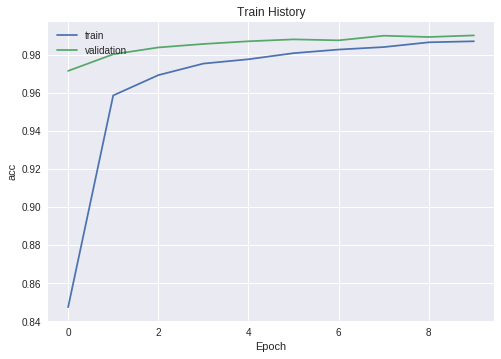

In [21]:
show_train_history(train_history,'acc','val_acc')

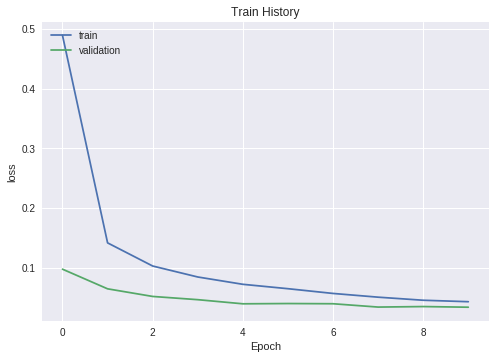

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 73us/step


0.9912

# Prediction

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [25]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx], cmap='binary')
    title ='label=' +str(labels[idx])
    if len(prediction)>0:
      title += 'prediction='+str(prediction[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

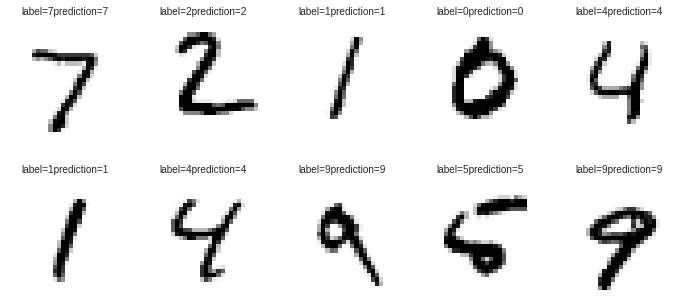

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0)

In [28]:

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1131,1,0,0,1,0,1,1,0
2,3,1,1024,0,1,0,0,2,1,0
3,0,0,1,1002,0,3,0,2,2,0
4,0,0,0,0,975,0,1,0,1,5
5,1,0,0,4,0,884,2,0,0,1
6,5,2,0,1,1,1,947,0,1,0
7,0,1,5,1,0,0,0,1016,1,4
8,2,0,2,2,1,1,0,2,960,4
